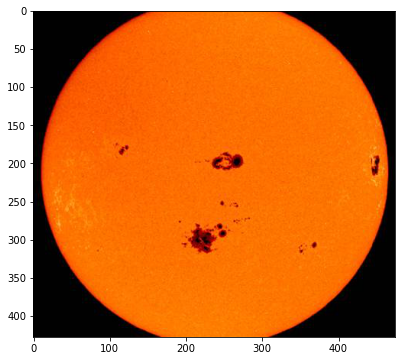

In [26]:
import matplotlib.pyplot as plt
image = plt.imread('Sun_sunspot.jpg')
plt.imshow(image)

# Background


Sunspots are temporary phenomena on the Sun's photosphere that appear as spots darker than the surrounding areas. They are regions of reduced surface temperature caused by concentrations of magnetic field flux that inhibit convection. Sunspot activity cycles are about every eleven years, with some variation in length. Over the solar cycle, sunspot populations rise quickly and then fall more slowly.

The 11-year sunspot cycle is actually half of a longer, 22-year cycle of solar activity. Each time the sunspot count rises and falls, the magnetic field of the Sun associated with sunspots reverses polarity; the orientation of magnetic fields in the Sun's northern and southern hemispheres switch. Thus, in terms of magnetic fields, the solar cycle is only complete (with the fields back the way they were at the start of the cycle) after two 11-year sunspot cycles. This solar cycle is, on average, about 22 years long - twice the duration of the sunspot cycle.



In this notebook, I am going to predict the Yearly sunspot number based on the dataset that contains yearly mean sunspot number from 1700 to 1988. I will use multiple ways to build the prediction model, including:  Moving Average Forecast,  Simple exponential smoothing ,Holt exponential smoothing,Holt winter exponential smoothing,ARIMA Forecast,Auto-arima model,Sarima model .

# Importing all libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt

%matplotlib inline
 
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

# Data Parsing

In [2]:
dateparse = lambda dates: pd.datetime.strptime(dates, '%Y')

# Dataset loading

In [3]:
time = pd.read_csv("sunspot.year.csv",
                   parse_dates=['time'], index_col='time',
                   date_parser=dateparse)
time.head()

,value
time,
1700-01-01,5.0
1701-01-01,11.0
1702-01-01,16.0
1703-01-01,23.0
1704-01-01,36.0


In [4]:
time1 = time['value']
time1.head()

time
1700-01-01     5.0
1701-01-01    11.0
1702-01-01    16.0
1703-01-01    23.0
1704-01-01    36.0
Name: value, dtype: float64

# Line plot

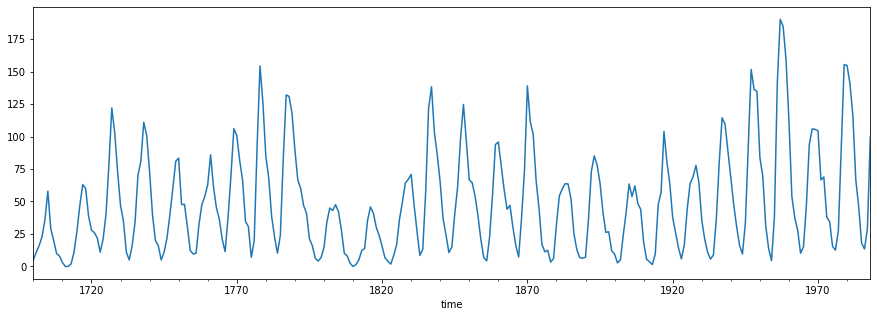

In [7]:
time1.plot(kind="line",figsize=(15,5))
plt.show()

# Shape of dataset

In [8]:
time.shape

(289, 1)

# Spliting dataset into train and test

In [5]:
train=time1[0:251] 
test=time1[251:]

# Checking first and last few entries of train and test

In [51]:
train.head()

time
1700-01-01     5.0
1701-01-01    11.0
1702-01-01    16.0
1703-01-01    23.0
1704-01-01    36.0
Name: value, dtype: float64

In [52]:
test.head(5)

time
1951-01-01    69.4
1952-01-01    31.5
1953-01-01    13.9
1954-01-01     4.4
1955-01-01    38.0
Name: value, dtype: float64

In [53]:
train.tail()

time
1946-01-01     92.6
1947-01-01    151.6
1948-01-01    136.3
1949-01-01    134.7
1950-01-01     83.9
Name: value, dtype: float64

In [54]:
test.tail()

time
1984-01-01     45.9
1985-01-01     17.9
1986-01-01     13.4
1987-01-01     29.2
1988-01-01    100.2
Name: value, dtype: float64

# Plot test and train data for visualisation

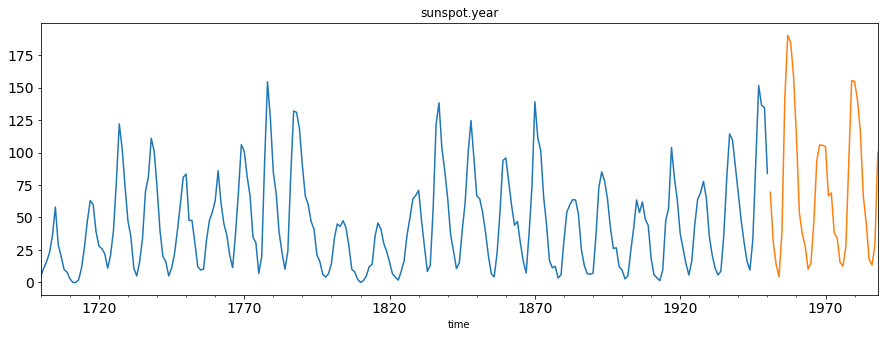

In [55]:
train.plot(figsize=(15,5), title= 'sunspot.year', fontsize=14)
test.plot(figsize=(15,5), title= 'sunspot.year', fontsize=14)
plt.show()

# Moving average

In [ ]:


#moving_avg = pd.rolling_mean(time1,12)

moving_avg =time1.rolling(50).mean()
time.plot(kind="line",figsize=(15,5))
moving_avg.plot(kind="line",figsize=(15,5),color='red')
plt.show()

# Decomposition using additive model

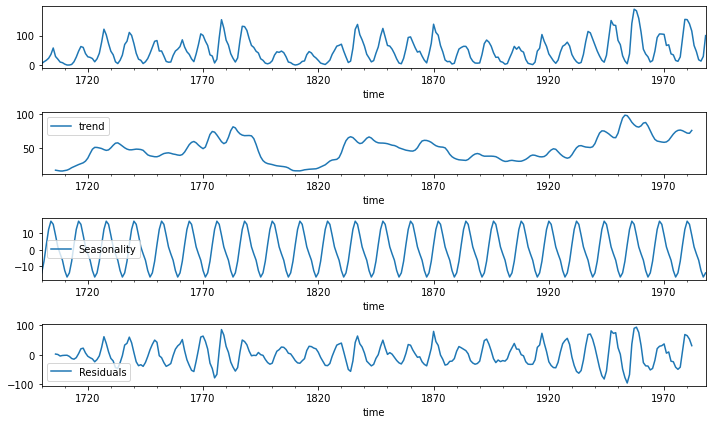

In [57]:
import statsmodels.tsa.seasonal as sts
decomposition = sts.seasonal_decompose(time1,model='additive', freq=12)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
time1.plot(kind="line",figsize=(10,6),label='Original')
plt.subplot(412)
trend.plot(kind="line",figsize=(10,6),label='trend')
plt.legend(loc='best')
plt.subplot(413)
seasonal.plot(kind="line",figsize=(10,6),label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
residual.plot(kind="line",figsize=(10,6),label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

# Simple Exponential Smoothing

In [59]:
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt

In [60]:
train = train.astype('float')
ses = SimpleExpSmoothing(train).fit()
ses1 = ses.forecast(38)
ses.summary()

C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  warnings.warn('No frequency information was'


Dep. Variable:,value,No. Observations:,251
Model:,SimpleExpSmoothing,SSE,115278.028
Optimized:,True,AIC,1542.542
Trend:,None,BIC,1549.593
Seasonal:,None,AICC,1542.705
Seasonal Periods:,None,Date:,"Wed, 04 Aug 2021"
Box-Cox:,False,Time:,16:48:33
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,0.9950000,alpha,True
initial_level,5.0000000,l.0,True


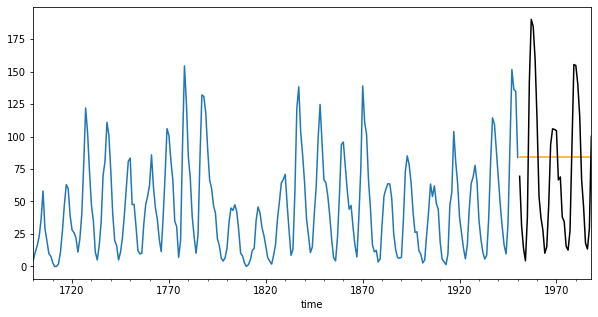

In [61]:
train.plot(kind="line",figsize=(10,5))
ses1.plot(kind="line",figsize=(10,5),color='orange')
test.plot(kind="line",figsize=(10,5),color='black')
plt.show()

# Holt Exponential Smoothing

In [64]:
hes = ExponentialSmoothing(train, trend="add").fit()
hes.summary()

C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  warnings.warn('No frequency information was'


Dep. Variable:,value,No. Observations:,251
Model:,ExponentialSmoothing,SSE,109684.537
Optimized:,True,AIC,1534.058
Trend:,Additive,BIC,1548.159
Seasonal:,None,AICC,1534.402
Seasonal Periods:,None,Date:,"Wed, 04 Aug 2021"
Box-Cox:,False,Time:,16:48:55
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,1.0000000,alpha,True
smoothing_trend,0.9379199,beta,True


In [65]:
hes1 = hes.forecast(38)

<AxesSubplot:xlabel='time'>

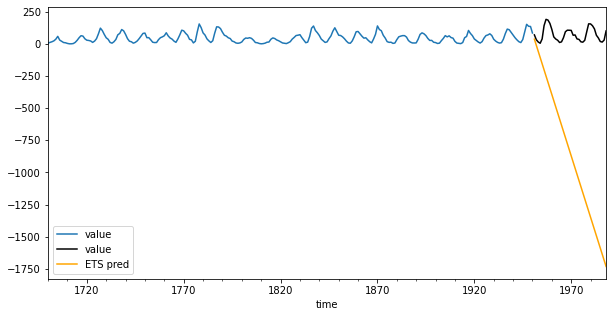

In [66]:
train.plot(kind="line",figsize=(10,5),legend=True)
test.plot(kind="line",figsize=(10,5),legend=True, color='black')
hes1.plot(kind="line",figsize=(10,5),color='orange',legend=True,label='ETS pred')

# Holt Winters Exponential Smoothing

In [107]:
hwes = ExponentialSmoothing(train , seasonal_periods=110 ,trend='add', seasonal="additive").fit()
hwes.summary()

C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  warnings.warn('No frequency information was'


Dep. Variable:,value,No. Observations:,251
Model:,ExponentialSmoothing,SSE,44321.279
Optimized:,True,AIC,1526.616
Trend:,Additive,BIC,1928.517
Seasonal:,Additive,AICC,1729.183
Seasonal Periods:,110,Date:,"Wed, 04 Aug 2021"
Box-Cox:,False,Time:,16:52:31
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,0.9963217,alpha,True
smoothing_trend,0.0006560,beta,True


In [108]:
hwes1 = hwes.forecast(38)

<AxesSubplot:xlabel='time'>

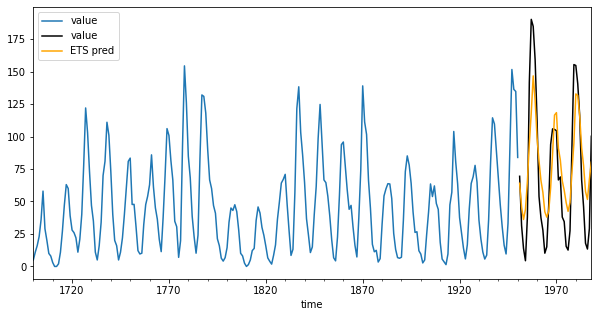

In [109]:
train.plot(kind="line",figsize=(10,5),legend=True)
test.plot(kind="line",figsize=(10,5),legend=True, color='black')
hwes1.plot(kind="line",figsize=(10,5),color='orange',legend=True,label='ETS pred')

# Checking stationarity with Dickey-Fuller test

In [120]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
  
    #Determing rolling statistics
    rolmean=pd.core.window.Rolling(timeseries, window=110).mean()
    rolstd = pd.core.window.Rolling(timeseries, window=110).std()



    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)
    
# H0: series is nonstationary
# H1: series is stationary

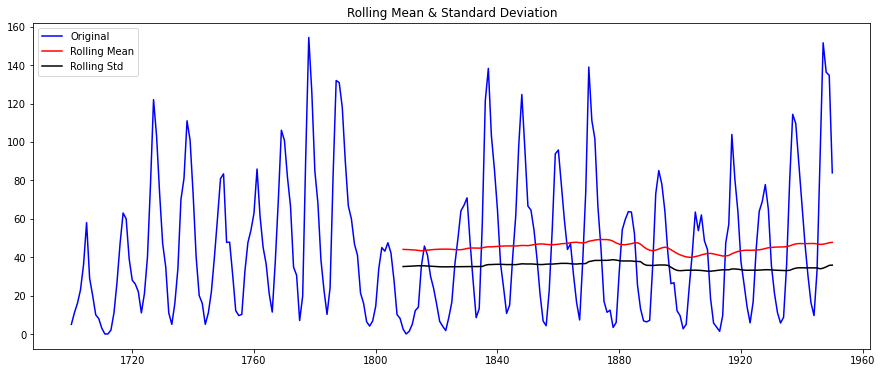

Results of Dickey-Fuller Test:
Test Statistic                  -2.962993
p-value                          0.038498
#Lags Used                       8.000000
Number of Observations Used    242.000000
Critical Value (1%)             -3.457664
Critical Value (5%)             -2.873559
Critical Value (10%)            -2.573175
dtype: float64


In [121]:
test_stationarity(train)

# ACF and PACF plots

In [122]:
from statsmodels.tsa.stattools import acf, pacf

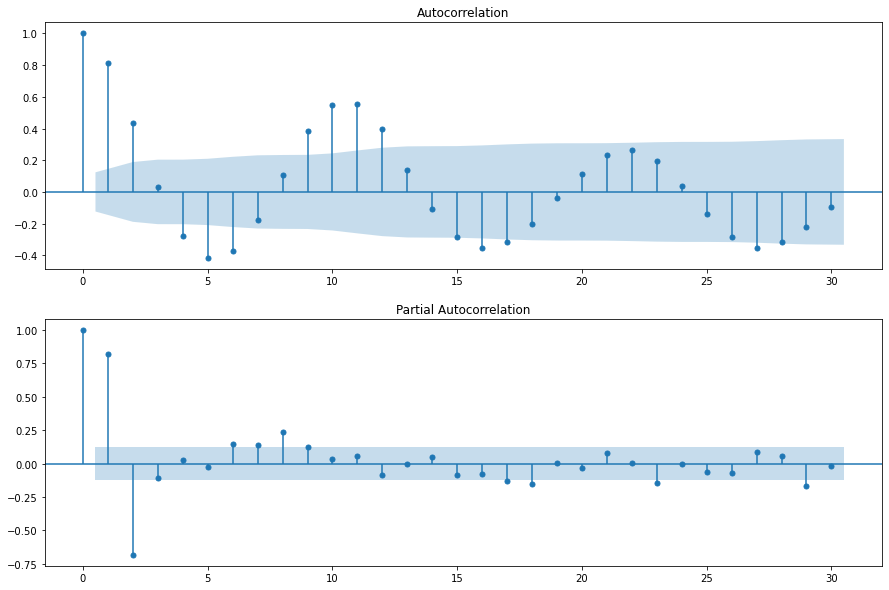

In [123]:
from pandas import Series
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from matplotlib import pyplot
pyplot.figure(figsize=(15,10))
pyplot.subplot(211)
plot_acf(train, ax=pyplot.gca(),lags=30)
pyplot.subplot(212)
plot_pacf(train, ax=pyplot.gca(),lags=30)
pyplot.show()

# Auto_arima Model

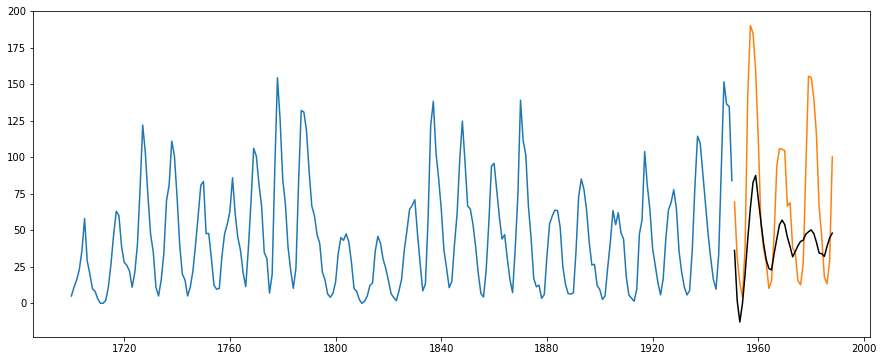

In [9]:
from pmdarima import auto_arima
model = auto_arima(train,seasonal=True,m=12)
model.fit(train)

forecast = model.predict(n_periods=len(test))
forecast = pd.DataFrame(forecast,index = test.index,columns=['Prediction'])

#plot the predictions for validation set
plt.plot(train, label='Train')
plt.plot(test, label='Test')
plt.plot(forecast, label='Prediction', color='black')
plt.show()

In [11]:
print(model.summary())

                                      SARIMAX Results                                       
Dep. Variable:                                    y   No. Observations:                  251
Model:             SARIMAX(3, 0, 0)x(2, 0, [1], 12)   Log Likelihood               -1030.884
Date:                              Sun, 08 Aug 2021   AIC                           2077.768
Time:                                      20:28:41   BIC                           2105.971
Sample:                                           0   HQIC                          2089.117
                                              - 251                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      6.0060      3.910      1.536      0.125      -1.658      13.670
ar.L1          1.25

In [12]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [13]:
print(mean_absolute_error(y_true=test,y_pred=forecast))

39.31452103846302


In [125]:
from pmdarima import auto_arima
stepwise_fit = auto_arima(train,start_p=0,
    start_q=0,
    max_p=5,
    max_d=2,
    max_q=5,
    start_P=0,
    start_Q=0,
    max_P=5,
    max_D=2,
    max_Q=5,
    max_order=3,
    m=12,
    seasonal=True,trace=True)

Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,0,0)[12] intercept   : AIC=2508.129, Time=0.03 sec
 ARIMA(1,0,0)(1,0,0)[12] intercept   : AIC=2213.365, Time=0.78 sec
 ARIMA(0,0,1)(0,0,1)[12] intercept   : AIC=2257.717, Time=0.92 sec
 ARIMA(0,0,0)(0,0,0)[12]             : AIC=2747.000, Time=0.00 sec
 ARIMA(1,0,0)(0,0,0)[12] intercept   : AIC=2233.929, Time=0.11 sec
 ARIMA(1,0,0)(2,0,0)[12] intercept   : AIC=2215.315, Time=1.55 sec
 ARIMA(1,0,0)(1,0,1)[12] intercept   : AIC=2215.341, Time=0.79 sec
 ARIMA(1,0,0)(0,0,1)[12] intercept   : AIC=2216.151, Time=0.76 sec
 ARIMA(1,0,0)(2,0,1)[12] intercept   : AIC=2216.778, Time=3.57 sec
 ARIMA(0,0,0)(1,0,0)[12] intercept   : AIC=2461.454, Time=0.39 sec
 ARIMA(2,0,0)(1,0,0)[12] intercept   : AIC=2082.271, Time=1.05 sec
 ARIMA(2,0,0)(0,0,0)[12] intercept   : AIC=2084.655, Time=0.24 sec
 ARIMA(2,0,0)(2,0,0)[12] intercept   : AIC=2083.063, Time=3.08 sec
 ARIMA(2,0,0)(1,0,1)[12] intercept   : AIC=2083.845, Time=1.60 sec
 ARIMA(2,0,0)(0,0,1

In [126]:
from pmdarima import auto_arima
stepwise_fit = auto_arima(train,start_p=0,
    start_q=0,
    max_p=5,
    max_d=2,
    max_q=5,
    start_P=0,
    start_Q=0,
    max_P=5,
    max_D=2,
    max_Q=5,
    max_order=3,
    seasonal=True,trace=True)

Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=2508.129, Time=0.08 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=2233.929, Time=0.23 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=2286.309, Time=0.20 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=2747.000, Time=0.02 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=2084.655, Time=0.37 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=2082.703, Time=0.49 sec
 ARIMA(4,0,0)(0,0,0)[0] intercept   : AIC=2084.634, Time=0.78 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=2083.732, Time=1.62 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=2082.970, Time=0.40 sec
 ARIMA(4,0,1)(0,0,0)[0] intercept   : AIC=2086.617, Time=0.54 sec
 ARIMA(3,0,0)(0,0,0)[0]             : AIC=2147.019, Time=0.11 sec

Best model:  ARIMA(3,0,0)(0,0,0)[0] intercept
Total fit time: 4.872 seconds


# ARIMA Model

In [6]:
from statsmodels.tsa.arima_model import ARIMA

In [8]:
model = ARIMA(train, order=(3,0,3))
model_fit=model.fit(disp=True)
print(model_fit.summary())

C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  warnings.warn('No frequency information was'


                              ARMA Model Results                              
Dep. Variable:                  value   No. Observations:                  251
Model:                     ARMA(3, 3)   Log Likelihood               -1035.569
Method:                       css-mle   S.D. of innovations             14.909
Date:                Sun, 08 Aug 2021   AIC                           2087.139
Time:                        20:21:13   BIC                           2115.342
Sample:                    01-01-1700   HQIC                          2098.489
                         - 01-01-1950                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const          44.5639      2.699     16.511      0.000      39.274      49.854
ar.L1.value     0.7298      0.258      2.828      0.005       0.224       1.235
ar.L2.value     0.3021      0.362      0.834    

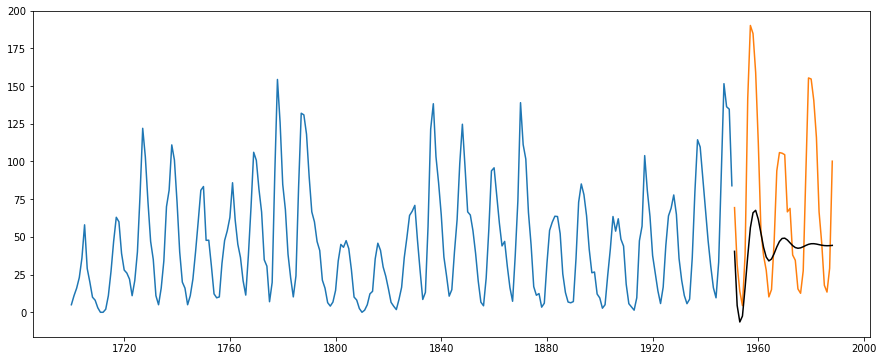

In [131]:
forecast = model_fit.forecast(steps=38)[0]

forecast = pd.DataFrame(forecast,index = test.index,columns=['Prediction'])

#plot the predictions for validation set
plt.plot(train, label='Train')
plt.plot(test, label='Test')
plt.plot(forecast, label='Prediction', color='black')
plt.show()

In [132]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [133]:
print(mean_absolute_error(y_true=test,y_pred=forecast))

42.2908468858753


# Seasonal Arima Model

In [185]:
import statsmodels.api as sm
model = sm.tsa.SARIMAX(train, order=(3,1,3), seasonal_order=(3,1,3,110))

C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  warnings.warn('No frequency information was'
C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  warnings.warn('No frequency information was'


In [186]:
model_fit=model.fit(disp=True)
print(model_fit.summary())

C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                      SARIMAX Results                                      
Dep. Variable:                               value   No. Observations:                  251
Model:             SARIMAX(3, 1, 3)x(3, 1, 3, 110)   Log Likelihood                -600.580
Date:                             Wed, 04 Aug 2021   AIC                           1227.161
Time:                                     23:36:42   BIC                           1265.402
Sample:                                 01-01-1700   HQIC                          1242.701
                                      - 01-01-1950                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7427      0.393      1.892      0.059      -0.027       1.512
ar.L2          0.4322      

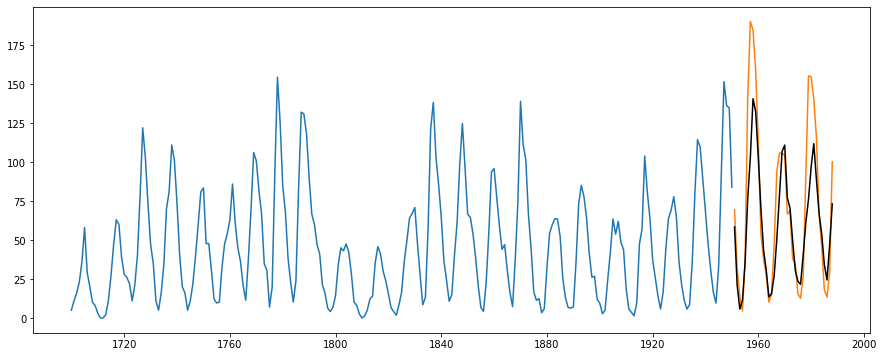

In [187]:
forecast = model_fit.forecast(steps=38)
#print(forecast)

#plot the predictions for validation set
plt.plot(train, label='Train')
plt.plot(test, label='Test')
plt.plot(forecast, label='Prediction', color='black')
plt.show()

In [188]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [189]:
print(mean_absolute_error(y_true=test,y_pred=forecast))

20.012738980497232
